In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

In [150]:
df_original = pd.read_csv('../clean_dataset.csv', sep=',', header=0)
df = pd.DataFrame(data=df_original)
sns.set(style="ticks", color_codes=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39050 entries, 0 to 39049
Data columns (total 41 columns):
n_tokens_title                  39050 non-null float64
n_tokens_content                39050 non-null float64
n_unique_tokens                 39050 non-null float64
n_non_stop_unique_tokens        39050 non-null float64
num_hrefs                       39050 non-null float64
num_self_hrefs                  39050 non-null float64
num_imgs                        39050 non-null float64
average_token_length            39050 non-null float64
num_keywords                    39050 non-null float64
kw_max_min                      39050 non-null float64
kw_avg_min                      39050 non-null float64
kw_min_max                      39050 non-null float64
kw_avg_max                      39050 non-null float64
kw_min_avg                      39050 non-null float64
kw_max_avg                      39050 non-null float64
kw_avg_avg                      39050 non-null float64
self_refere

In [154]:
features = df[[c for c in df if (c != "shares")]]
#features = df[[c for c in df if (c == 'kw_avg_avg') or (c == 'LDA_03') or (c == 'kw_max_avg')]]
target = df["shares"]

#features = list(zip(df['kw_avg_avg'], df['LDA_03'], df['kw_max_avg'], df['self_reference_avg_sharess'], df['self_reference_min_shares'], df['self_reference_max_shares']))
#target = np.array(df['shares'])

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=12)

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39050 entries, 0 to 39049
Data columns (total 40 columns):
n_tokens_title                  39050 non-null float64
n_tokens_content                39050 non-null float64
n_unique_tokens                 39050 non-null float64
n_non_stop_unique_tokens        39050 non-null float64
num_hrefs                       39050 non-null float64
num_self_hrefs                  39050 non-null float64
num_imgs                        39050 non-null float64
average_token_length            39050 non-null float64
num_keywords                    39050 non-null float64
kw_max_min                      39050 non-null float64
kw_avg_min                      39050 non-null float64
kw_min_max                      39050 non-null float64
kw_avg_max                      39050 non-null float64
kw_min_avg                      39050 non-null float64
kw_max_avg                      39050 non-null float64
kw_avg_avg                      39050 non-null float64
self_refere

In [170]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

knn = KNeighborsRegressor(n_neighbors=70, weights="uniform", algorithm='auto')
model = knn.fit(X_train, Y_train)
score = knn.score(X_train, Y_train)

predicted = model.predict(X_test)

print('mean_squared_error %f' % mean_squared_error(Y_test, predicted))
print('mean_absolute_error %f' % mean_absolute_error(Y_test, predicted))
print('explained_variance_score %f' % explained_variance_score(Y_test, predicted))
print('r2_score %f ' % r2_score(Y_test, predicted))

mean_squared_error 10601203.927783
mean_absolute_error 1874.624944
explained_variance_score 0.031762
r2_score 0.029818 


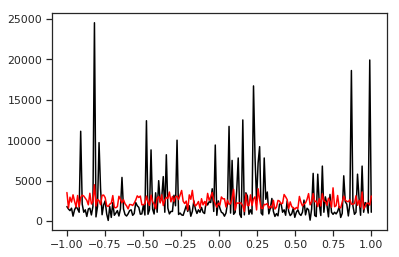

In [161]:
plt.plot(np.linspace(-1, 1, 200), Y_test[:200], label='data', color='black')
plt.plot(np.linspace(-1, 1, 200), predicted[:200], label='predicted', color='red')